In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import constants, os, math
import Plotting as pl

In [3]:
df_db = pl.buildDataframe([constants.SHOCK, constants.HOTCORE], constants.folder, constants.physical, constants.species, singleDf=False)
la_df=pl.localAbundanceDataframe(df_db, constants.species, constants.physical, constants.BOTH, momento=constants.ALL, singleDf=False)

In [84]:
tmaxs=df_db.loc[(df_db['gasTemp'] > 15)&(df_db['tipo']==constants.SHOCK)].groupby(['runName'],as_index=False)[['runName', 'Time']].max()
tmins=df_db.loc[df_db['gasTemp'] > 15].groupby(['runName'],as_index=False)[['runName', 'Time']].transform('min')

In [76]:
cmap=mpl.colormaps['gnuplot']
colors = list(cmap([n/la_df['runName'].nunique() for n in range(la_df['runName'].nunique())]))

IndexError: index 0 is out of bounds for axis 0 with size 0

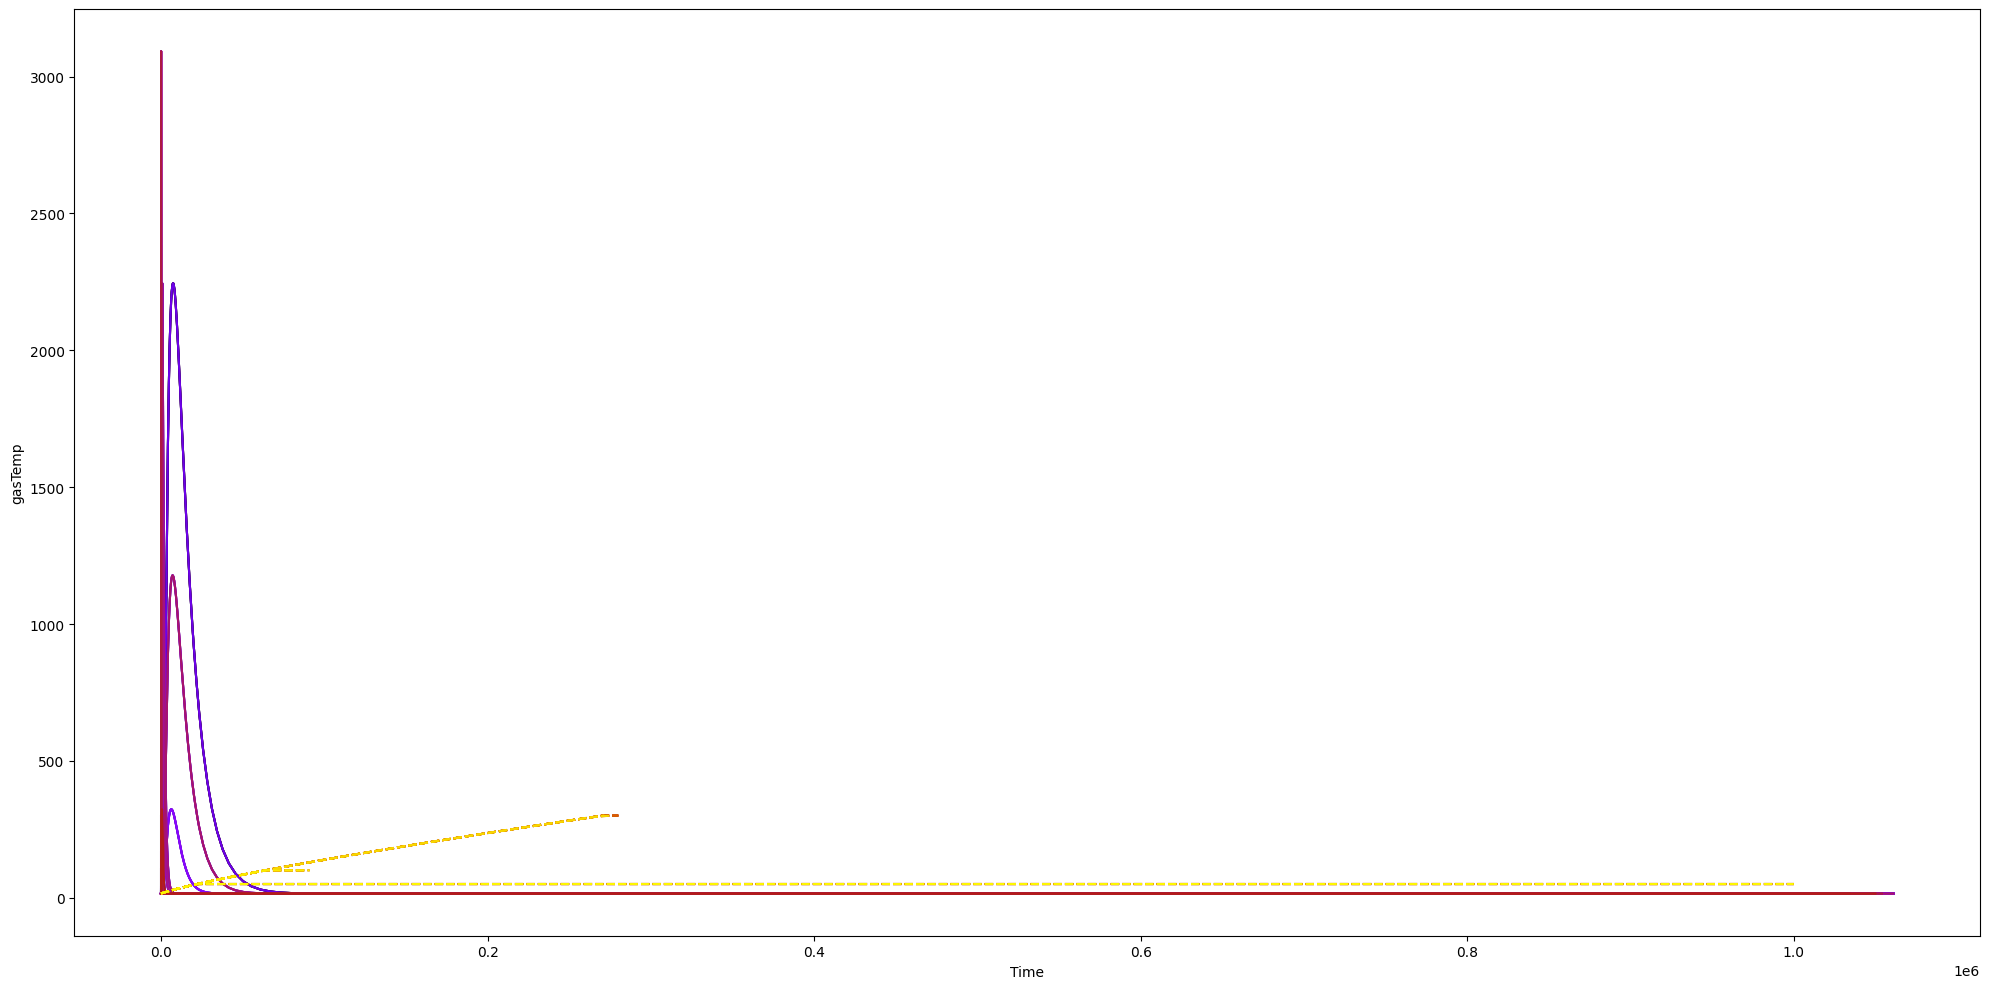

In [85]:
fig, ax = plt.subplots(figsize=(20,10), layout='tight')
sns.lineplot(data=la_df, x='Time', y='gasTemp',
            hue='runName', style='tipo',
            palette=colors, legend=None,
            ax=ax)

for i, run in enumerate(set(la_df['runName'].values)):
    ax.axvline(tmaxs[tmaxs['runName']==run]['Time'].iat[0], c=colors[i])

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xbound(1,la_df['Time'].max())

Text(0.5, 0.98, 'CH3OH Abundance - Time Evolution Comparison \niDens')

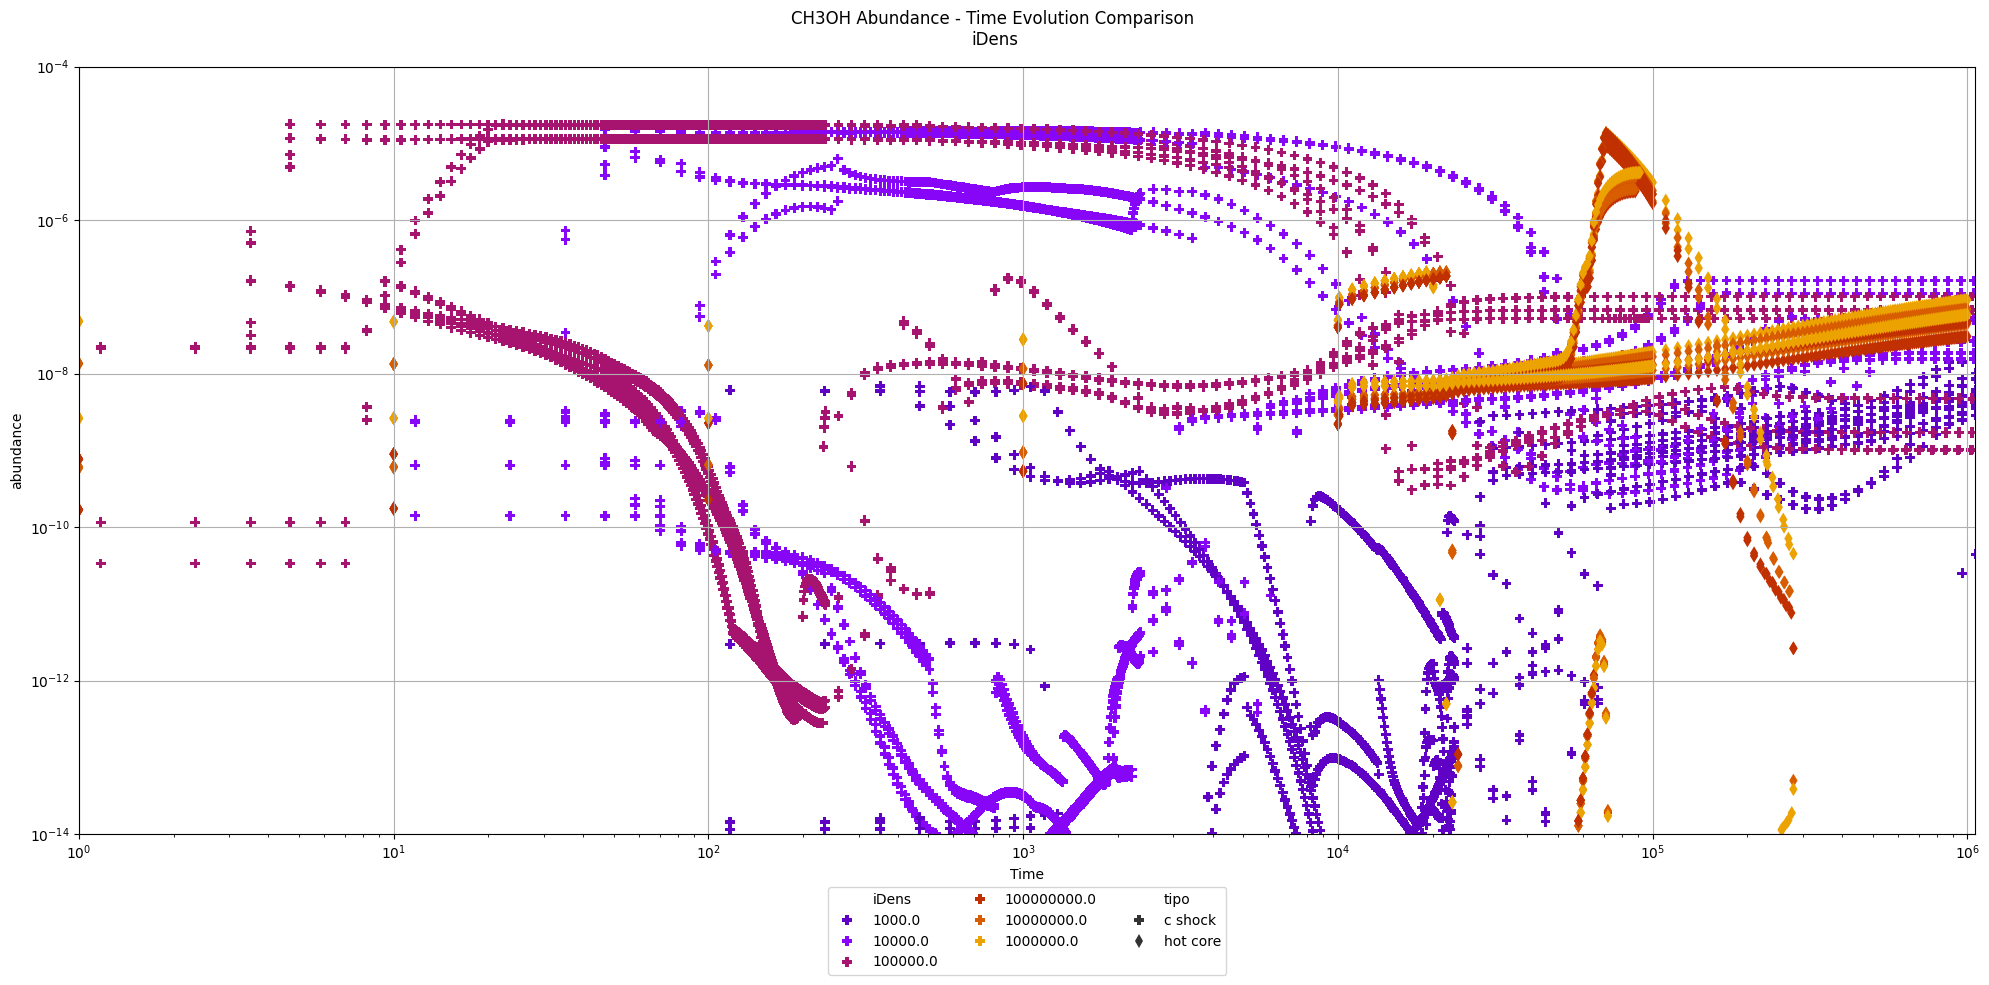

In [6]:
hue=constants.IDENS

fig, ax = plt.subplots(figsize=(20,10), layout='tight')
ax.grid(True)  
# sns.lineplot(data=df, x='Time', y='abundance',
sns.scatterplot(data=la_df, x='Time', y='abundance',
            hue=hue, style='tipo',
            palette='gnuplot',
            linewidth=0, s=50, markers={constants.HOTCORE: "d", constants.SHOCK: "P"},
            # errorbar=lambda x: (x.min(), x.max()),
            ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xbound(1,la_df['Time'].max())
ax.set_ybound(1e-14,1e-4)
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.06), ncol=3 if hue==constants.IDENS else 2)
fig.suptitle('CH3OH Abundance - Time Evolution Comparison \n'+' | '.join([hue]))
# if saveFig: fig.savefig(figName, dpi=300, bbox_inches='tight')